<a href="https://colab.research.google.com/github/DhirajBembade/Capstone-Projects/blob/main/Milk%20Quality%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**#Milk Quality Prediction**:

---


Target

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.

#**Dataset:**

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
pH: This feature defines pH of the milk, which is in the range of 3 to 9.5. temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.

taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).

odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).

fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).

turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).

colour: This feature defines the color of the milk, which is in the range of 240 to 255.

grade: This is the target and takes the values: low_quality, medium_quality, or high_quality.

# **Importing Necessary libraries-**

In [1]:
# Data processing, Linear algebra
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")


# **Mount/Reading our dataset-**


In [2]:
df = pd.read_csv("/content/drive/MyDrive/milk_quality.csv")

# **Basic Information about our Dataset-**

In [3]:
df.shape

(1059, 8)

In [4]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [6]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [7]:
df.duplicated().sum()

976

#**Checking for NaN values-**

In [8]:
pd.DataFrame(df.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


👉 As Per dataset we have-

* columns-8 with 1059 records/entries

* PH column - has float datatype

* Grade - object 

* all other in-int

we don't have null-values in our dataset.

#**Statistical information-**

In [11]:
df.describe(include = "all")

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,NaN
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,NaN
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,NaN
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,NaN
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,NaN
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,NaN


In [12]:
df.describe(include = ['O']).T

,count,unique,top,freq
Grade,1059,3,low,429


In [13]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

#**EDA-**

In [14]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('\n')

pH
[6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]


Temprature
[35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]


Taste
[1 0]


Odor
[0 1]


Fat 
[1 0]


Turbidity
[0 1]


Colour
[254 253 246 255 250 247 245 240 248]


Grade
['high' 'low' 'medium']




In [15]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('\n')

pH
6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64


Temprature
45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64


Taste
1    579
0    480
Name: Taste, dtype: int64


Odor
0    601
1    458
Name: Odor, dtype: int64


Fat 
1    711
0    348
Name: Fat , dtype: int64


Turbidity
0    539
1    520
Name: Turbidity, dtype: int64


Colour
255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: Colour, dtype: int64


Grade
low       429
medium    374
high      256
Name: Grade, dtype: int64




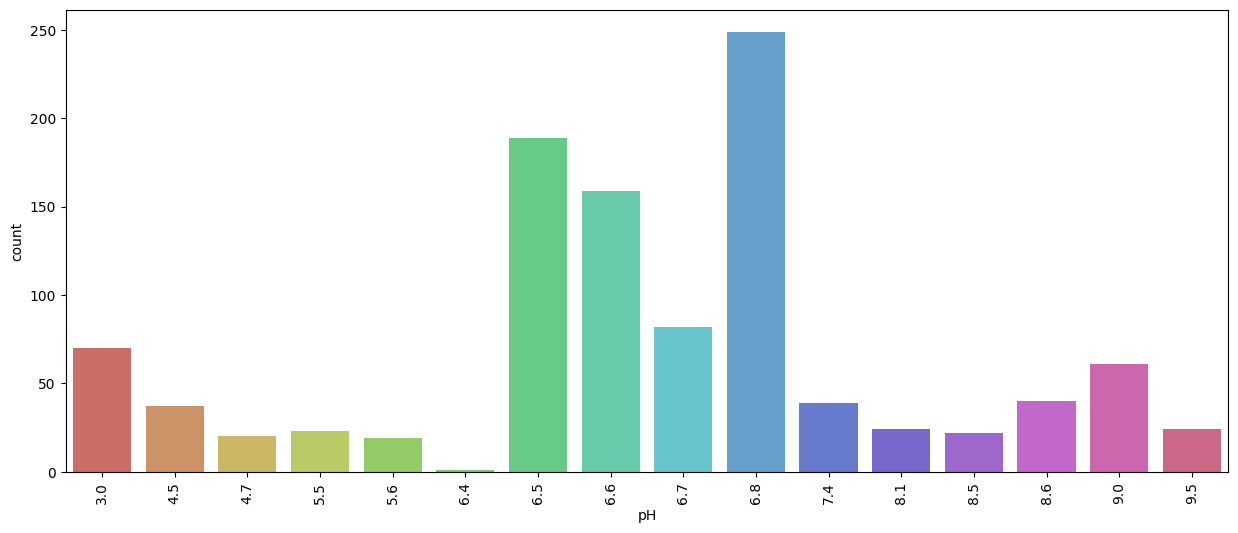

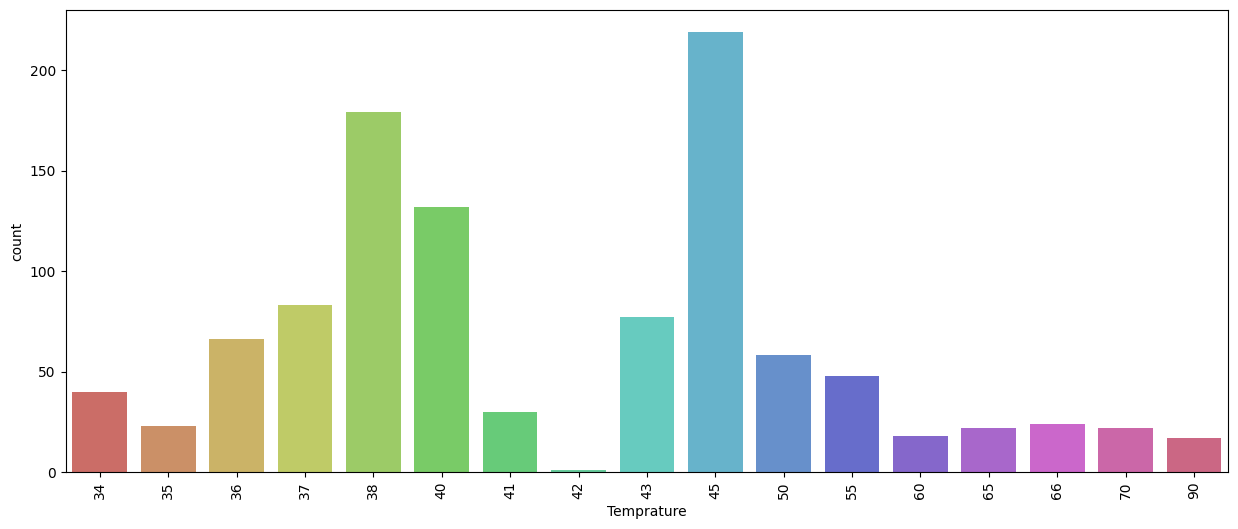

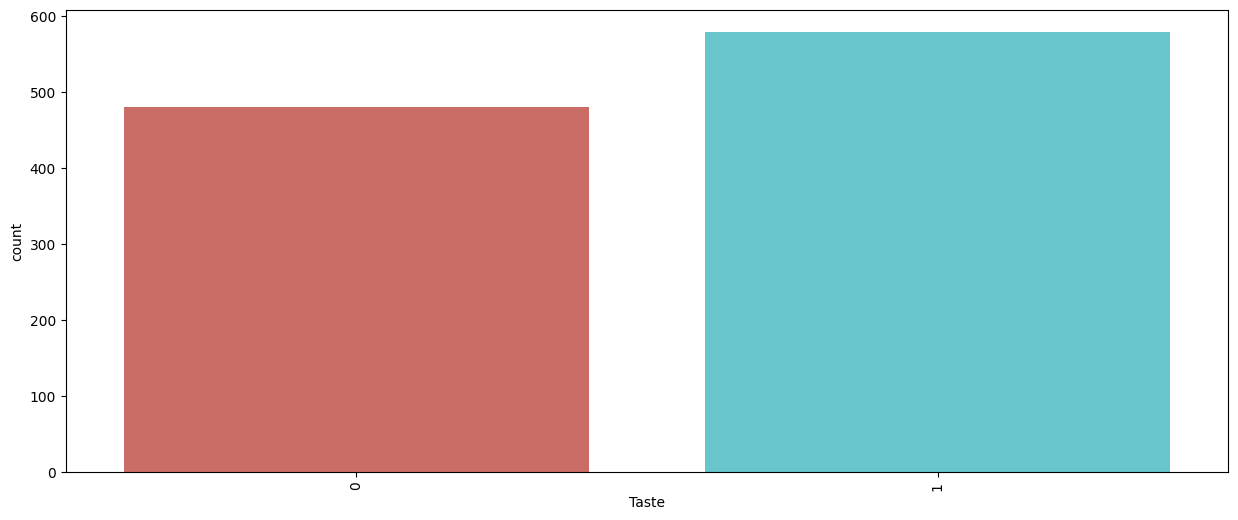

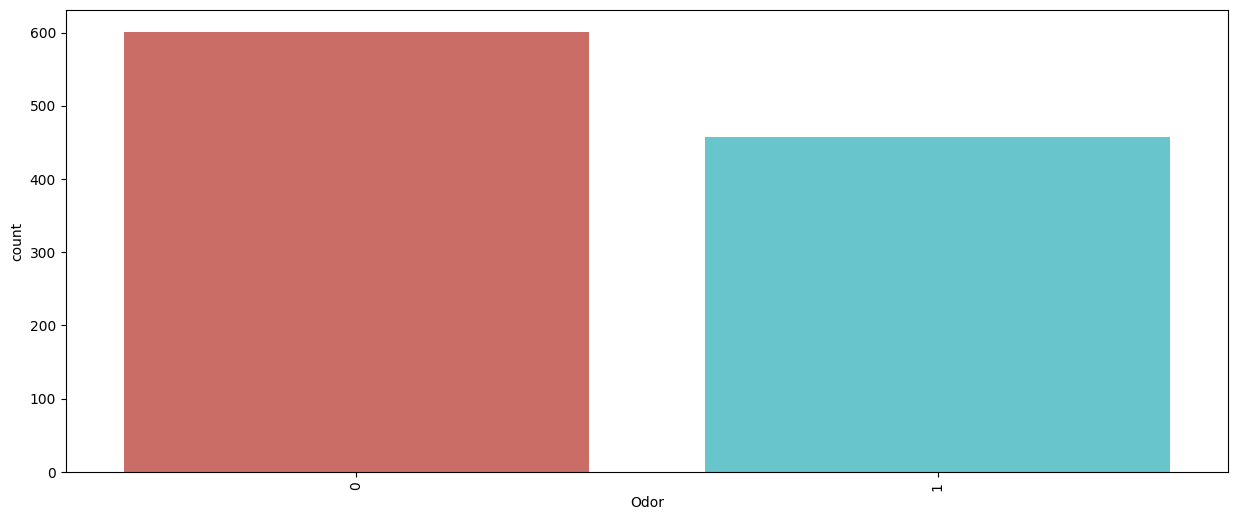

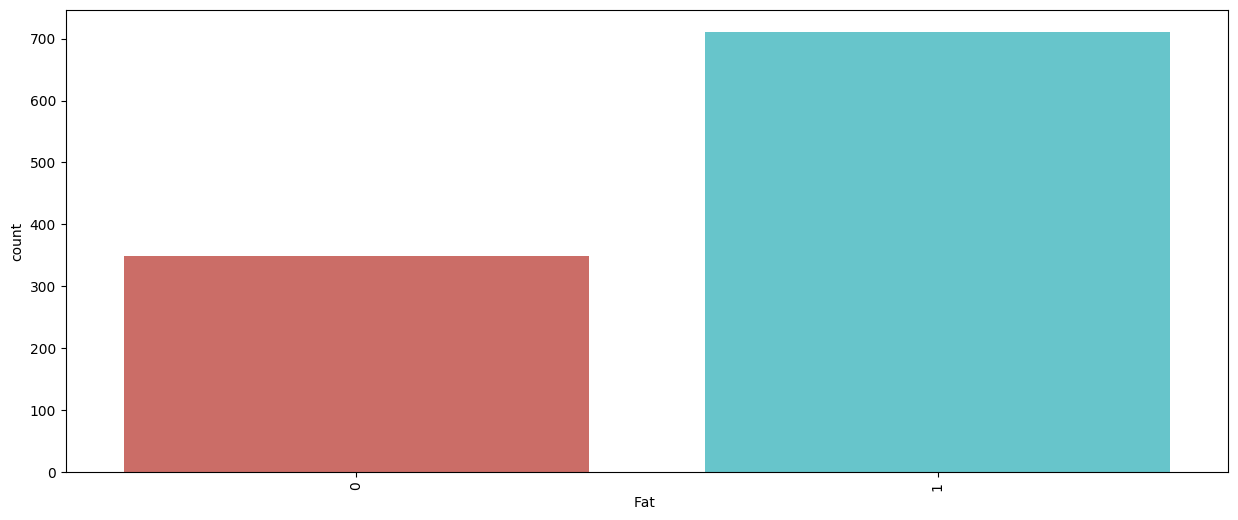

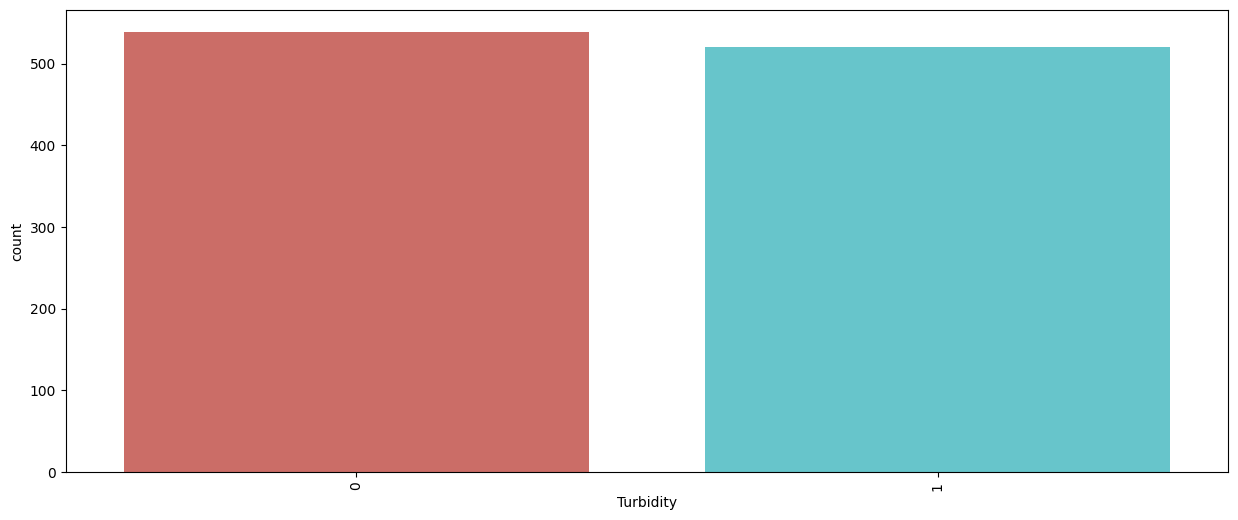

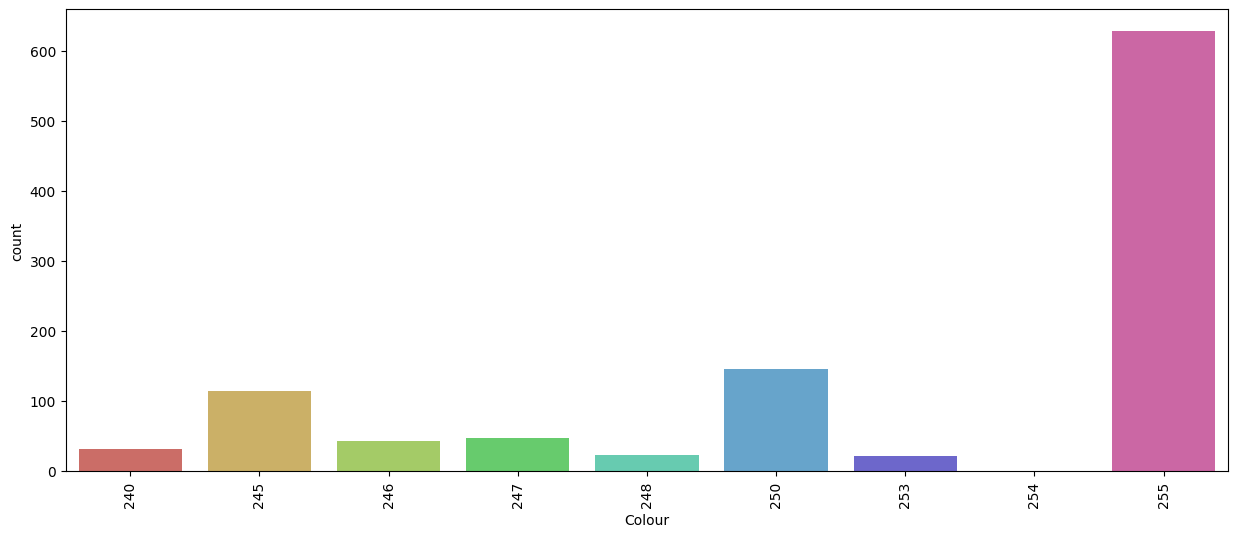

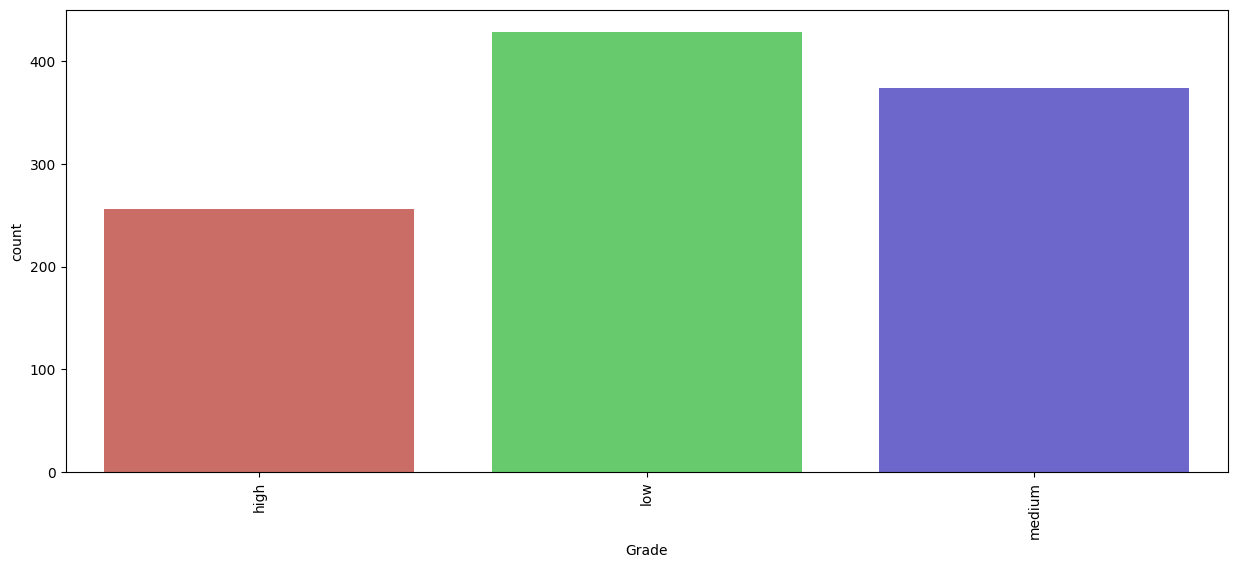

In [16]:
for i in df.columns:
  plt.figure(figsize=(15,6))
  sns.countplot( x = df[i], data = df, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()

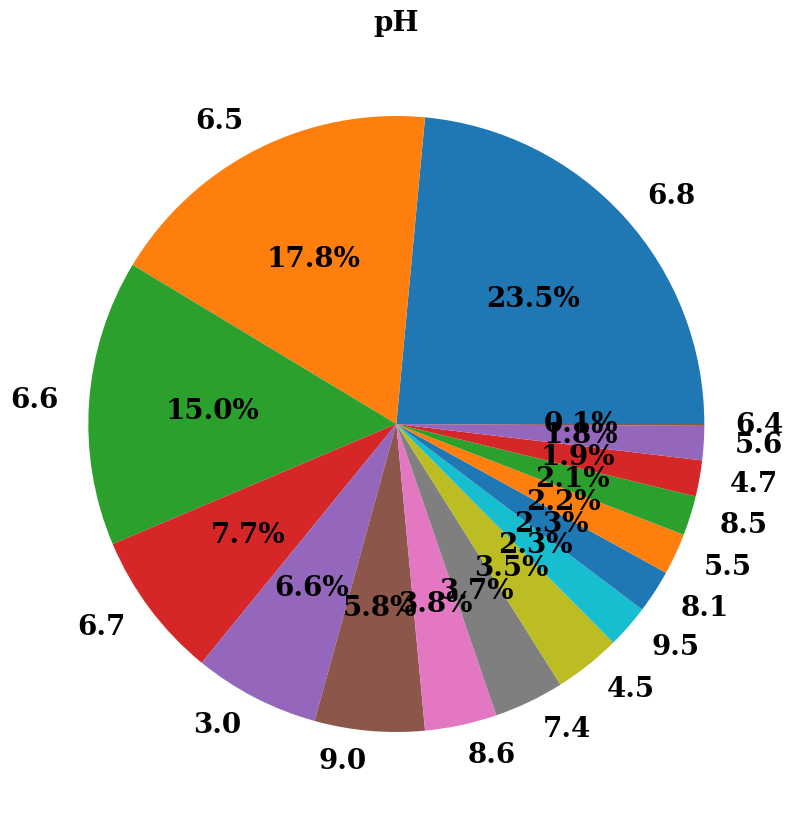

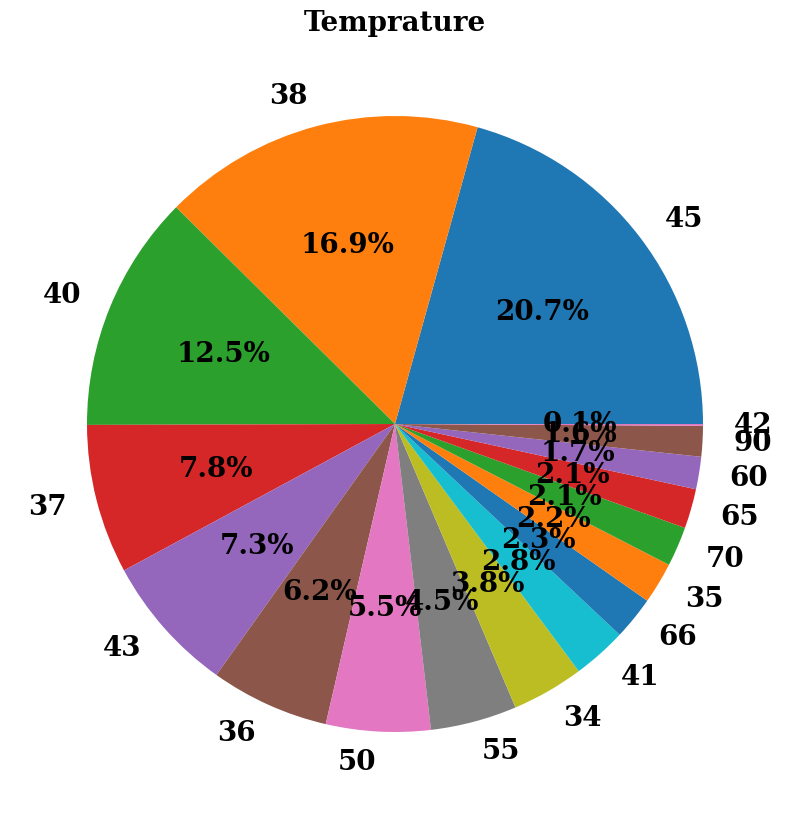

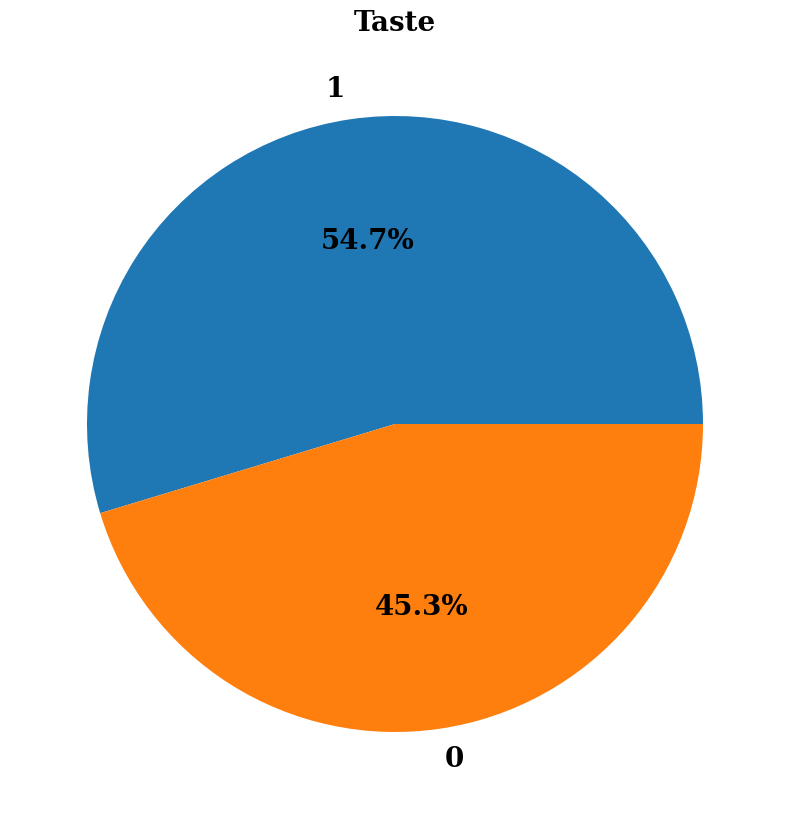

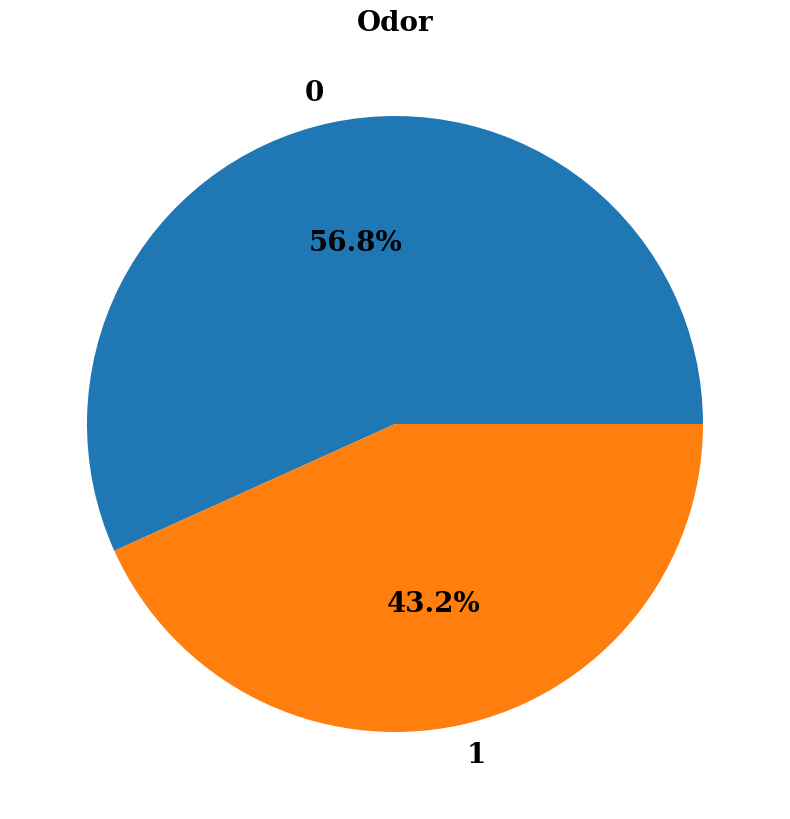

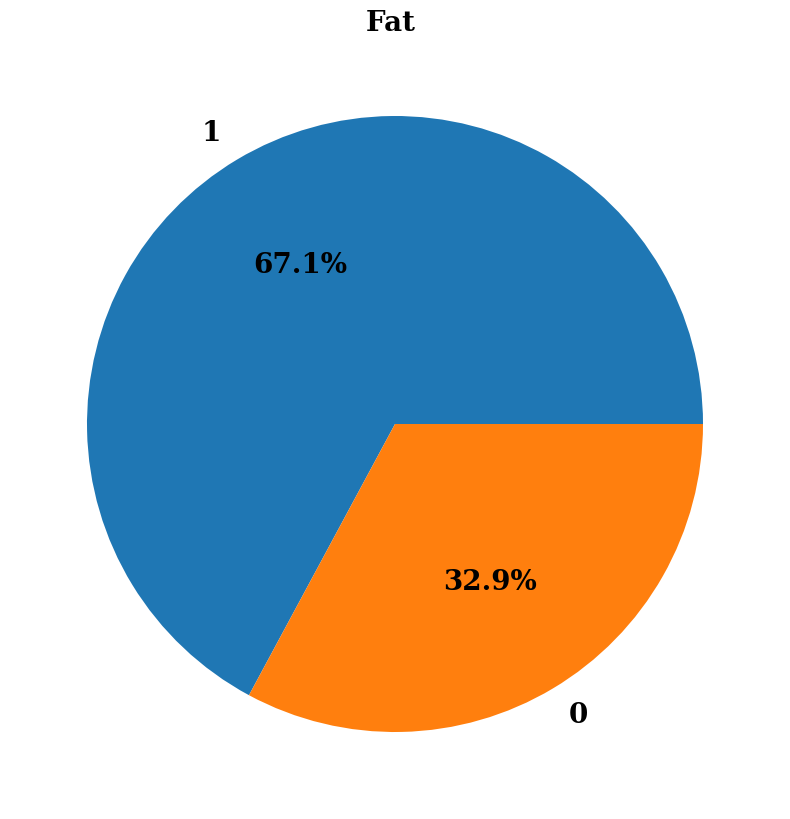

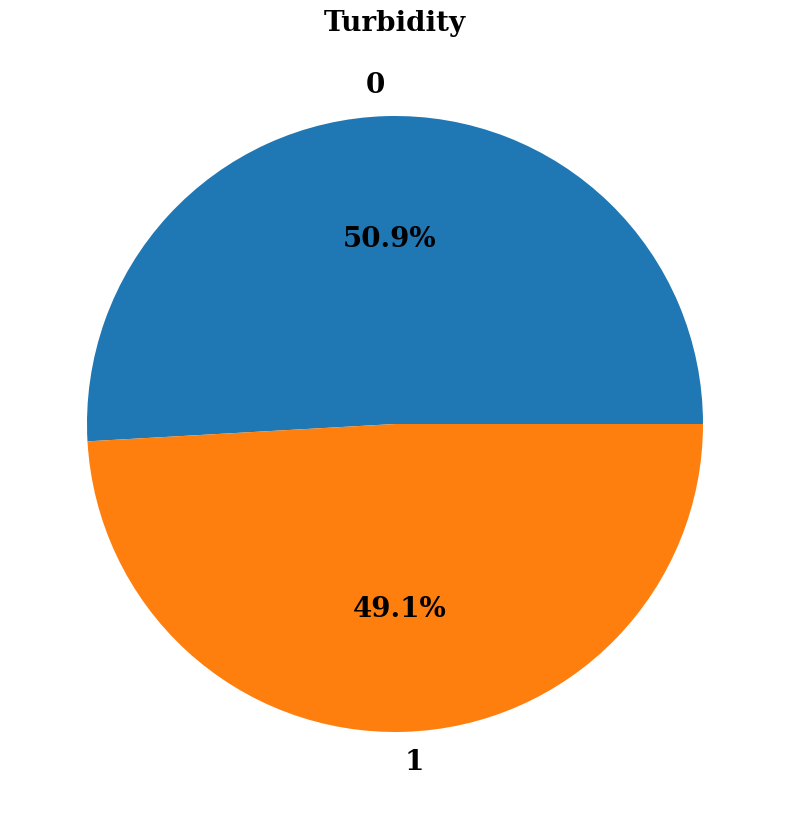

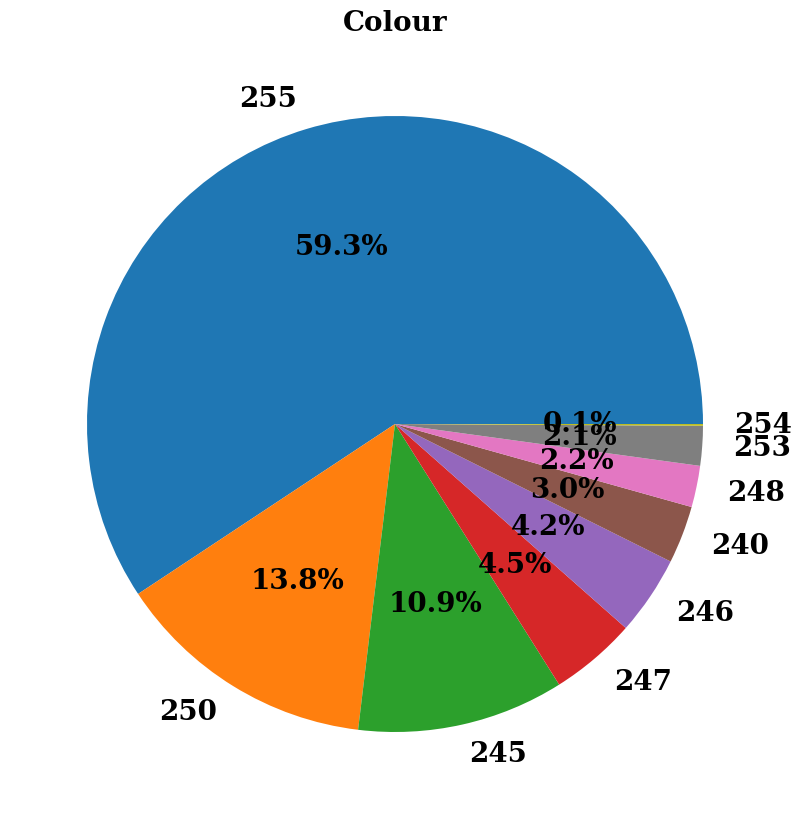

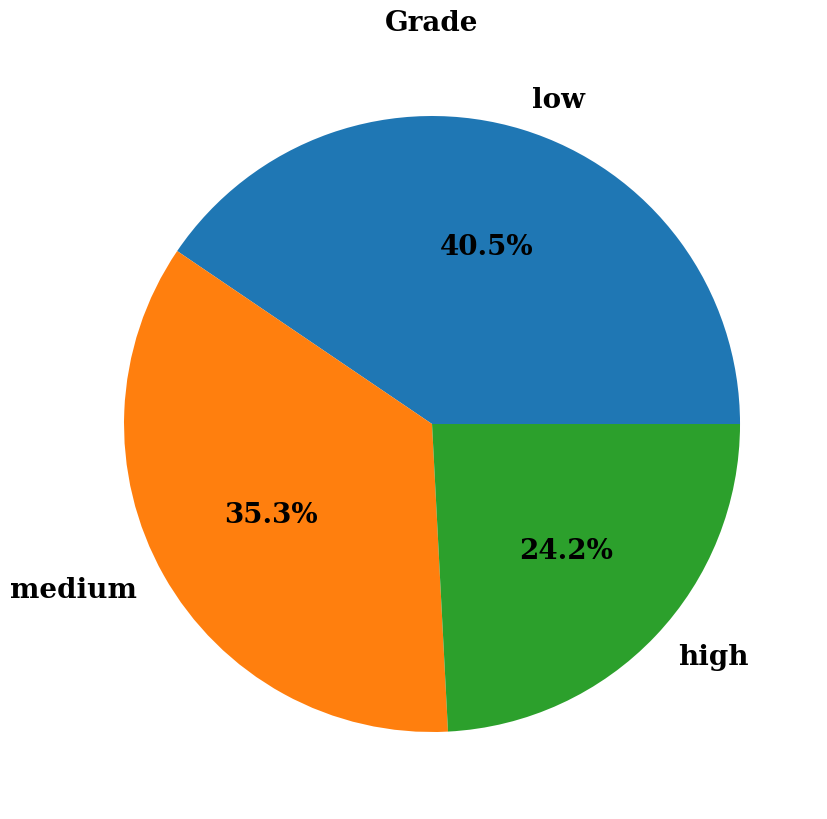

In [17]:
for i in df.columns:
  plt.figure(figsize=(30,10))
  plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,
          autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                        'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
  hfont = {'fontname':'serif', 'weight': 'bold'}
  plt.title(i, size=20, **hfont) 
  plt.show()


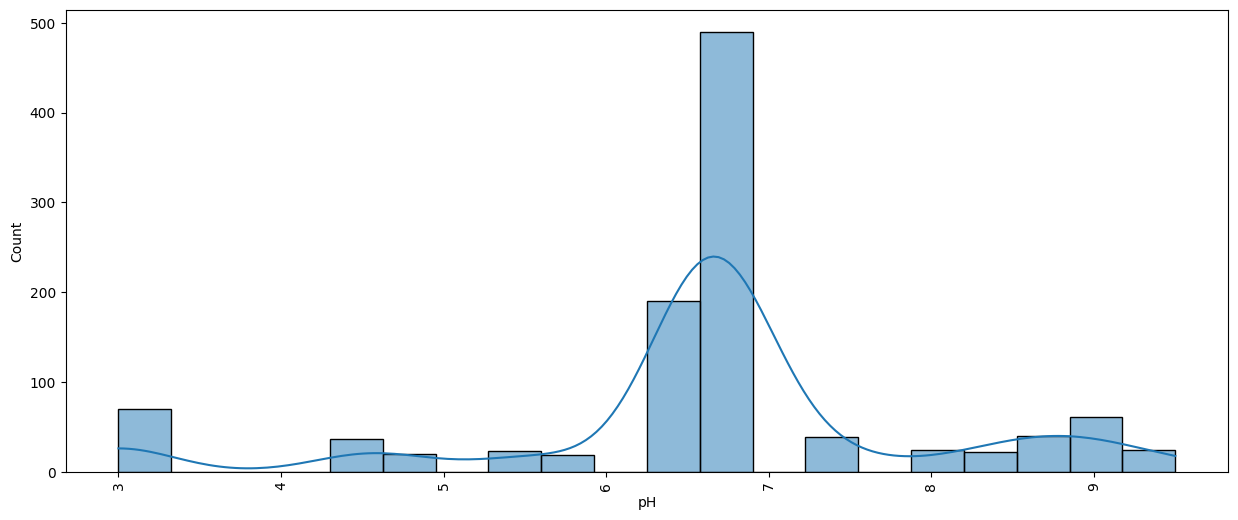

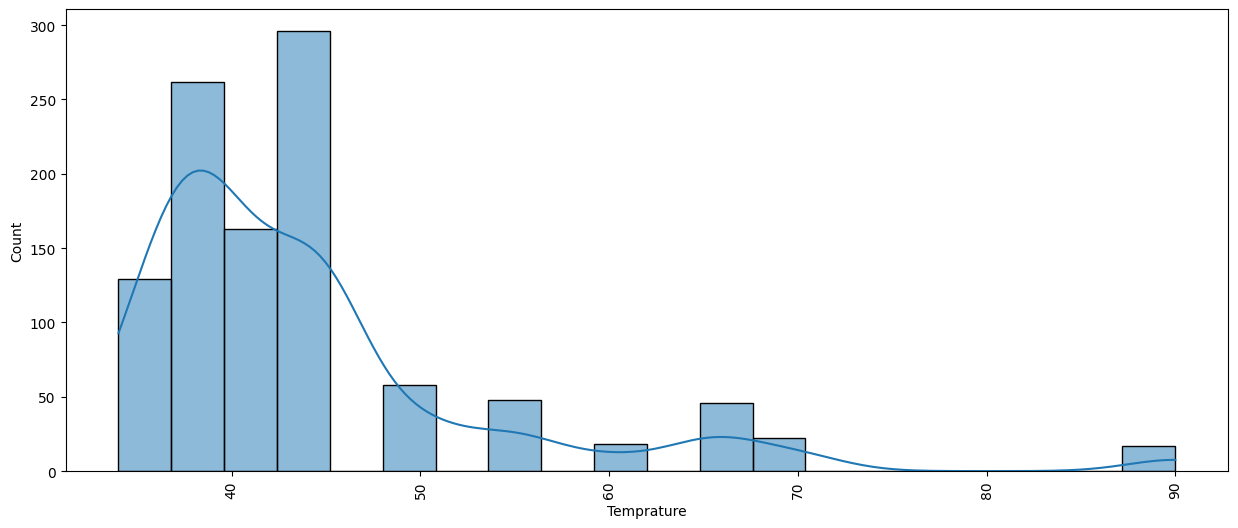

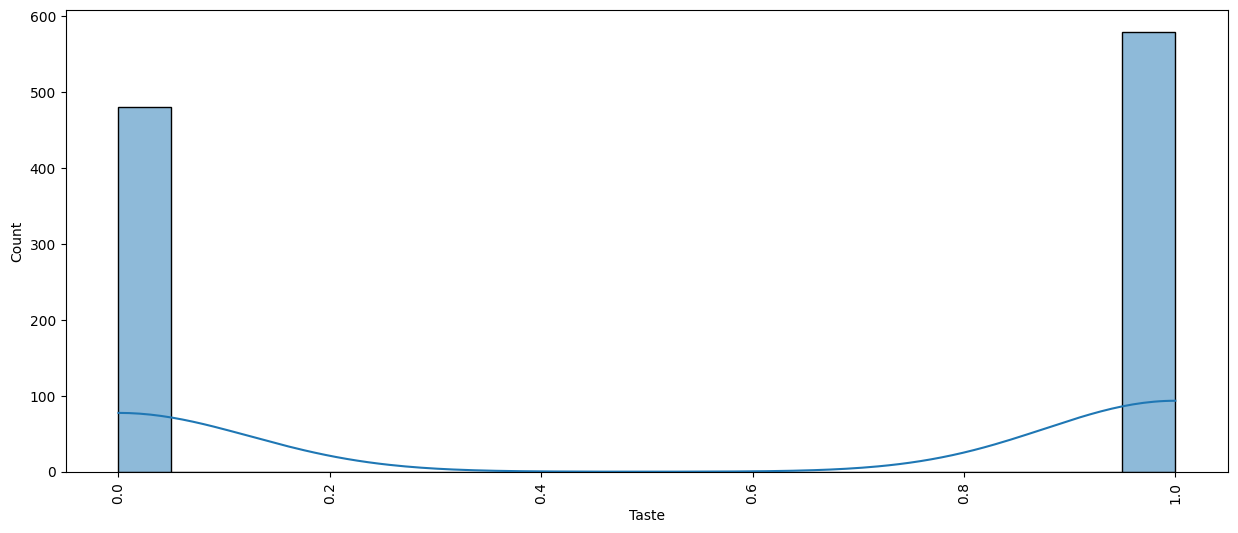

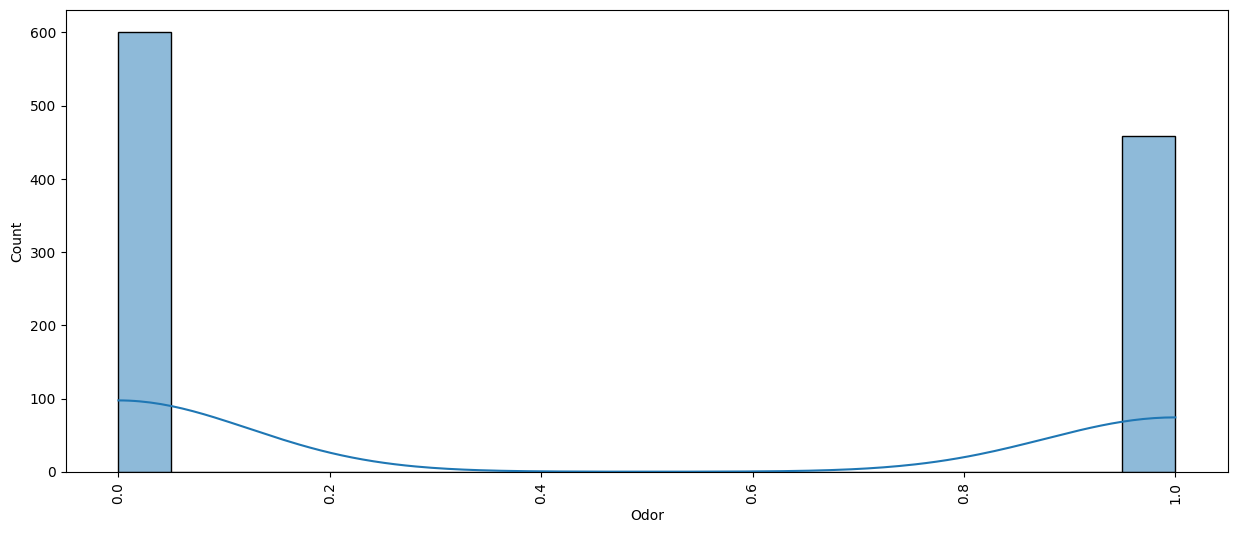

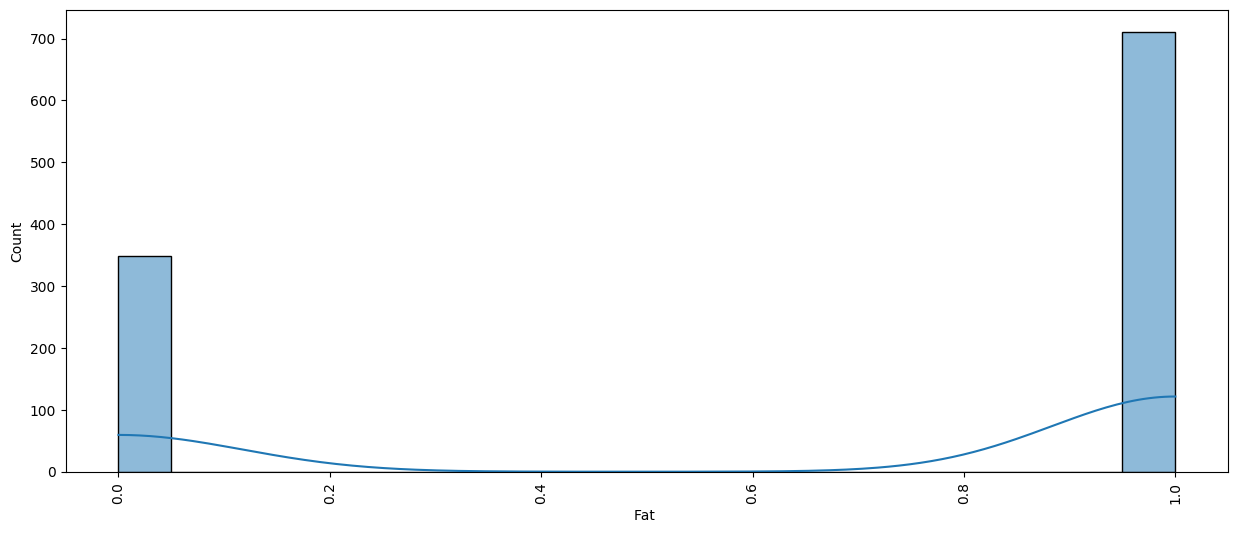

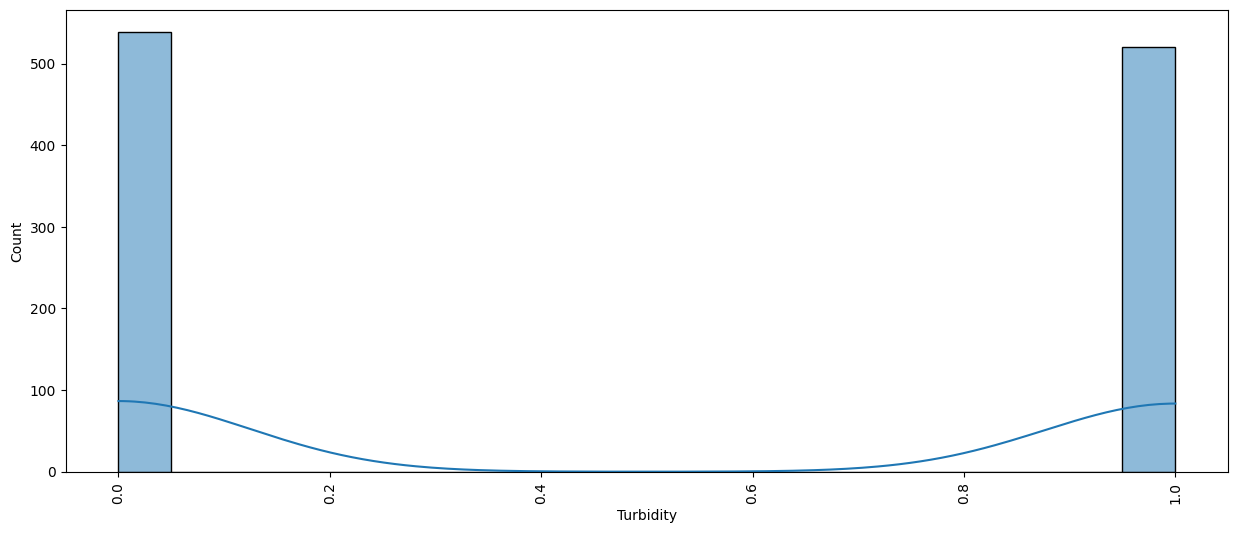

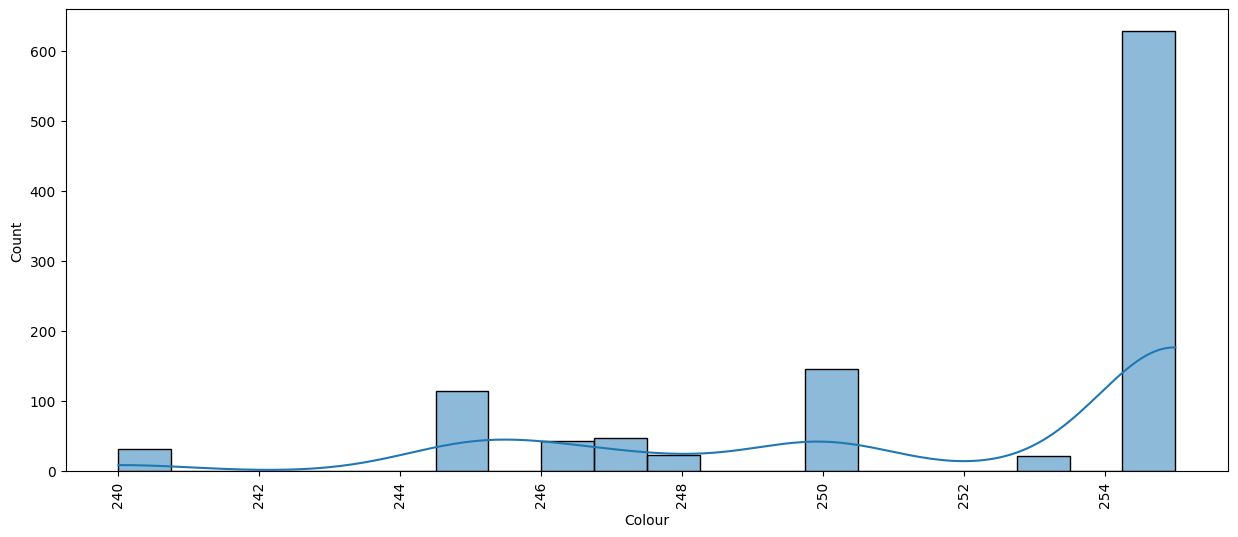

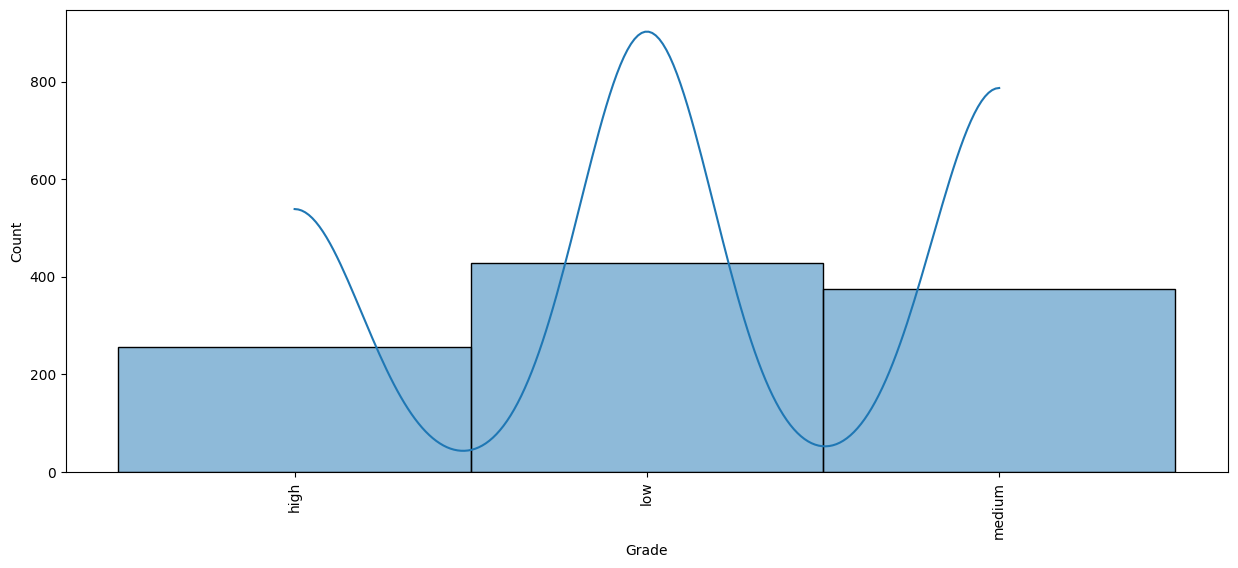

In [18]:
for i in df.columns:
  plt.figure(figsize=(15,6))
  sns.histplot(df[i], kde = True, bins = 20, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()


In [19]:
#Distribution plot-

#for i in df.columns:
#  plt.figure(figsize=(15,6))
#  sns.distplot(df[i], kde = True, bins = 20) 
#  plt.xticks(rotation = 90)
#  plt.show()

In [20]:
#Boxplot for outliers

#for i in df.columns:
#  plt.figure(figsize=(15,6))
#  sns.boxplot(x=df[i], data = df, palette = 'hls') 
#  plt.xticks(rotation = 90)
#  plt.show()


In [21]:
# Violinplot

#for i in df.columns:
#  plt.figure(figsize=(15,6))
#  sns.violinplot(x=df[i], data = df, palette = 'hls') 
#  plt.xticks(rotation = 90)
#  plt.show()

In [22]:
#Lineplot

#for i in df.columns:
#  for j in df.columns:
#    plt.figure(figsize=(15,6))
#    sns.lineplot(x = df[i], y = df[j], data = df, palette = 'hls') 
#    plt.xticks(rotation = 90)
#    plt.show()

In [23]:
#Scatterplot

#for i in df.columns:
#  for j in df.columns:
#    plt.figure(figsize=(15,6))
#    sns.scatterplot(x = df[i], y = df[j], data = df, palette = 'hls') 
#    plt.xticks(rotation = 90)
#    plt.show()

In [24]:
#Barplot

#for i in df.columns:
#  for j in df.columns:
#    plt.figure(figsize=(15,6))
#    sns.barplot(x = df[i], y = df[j], data = df, palette = 'hls') 
#    plt.xticks(rotation = 90)
#    plt.show()


In [25]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [26]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

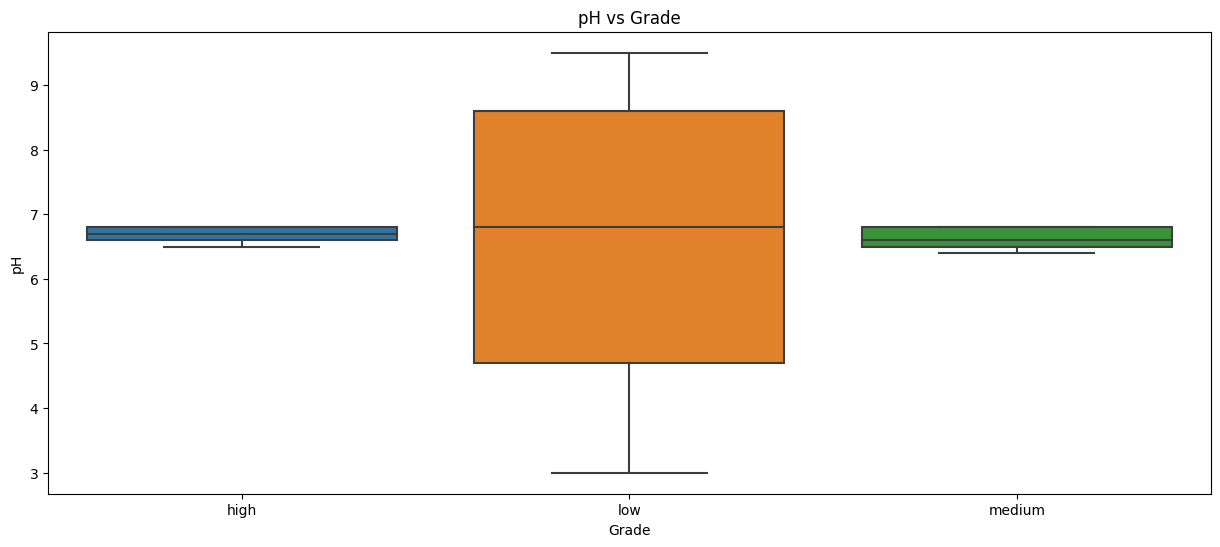

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="pH")
plt.title('pH vs Grade')
plt.xlabel('Grade')
plt.ylabel('pH')
plt.show()

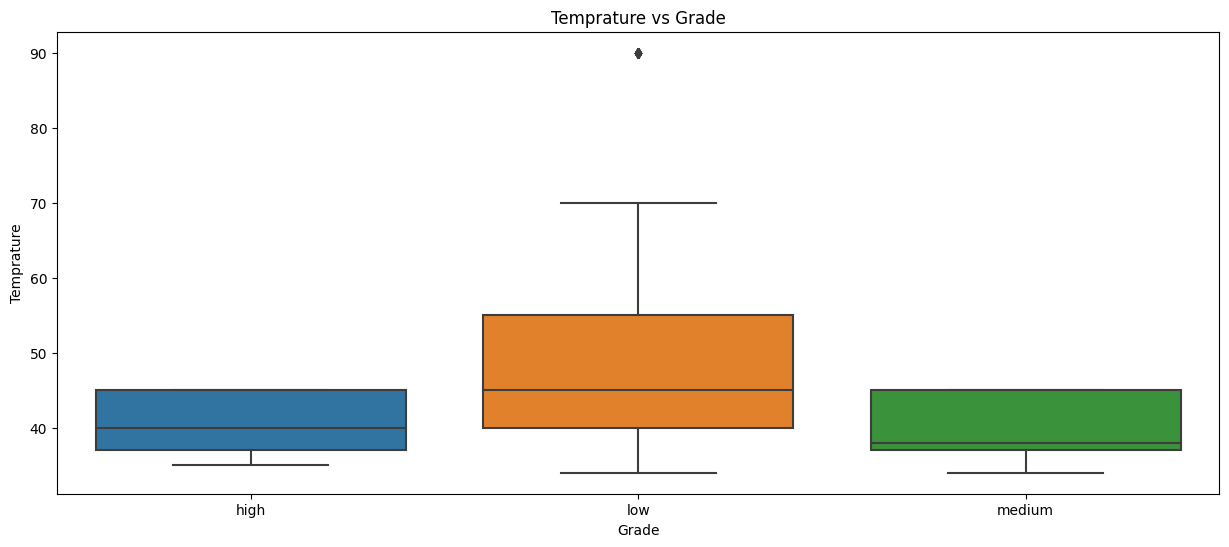

In [28]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Temprature")
plt.title('Temprature vs Grade')
plt.xlabel('Grade')
plt.ylabel('Temprature')
plt.show()

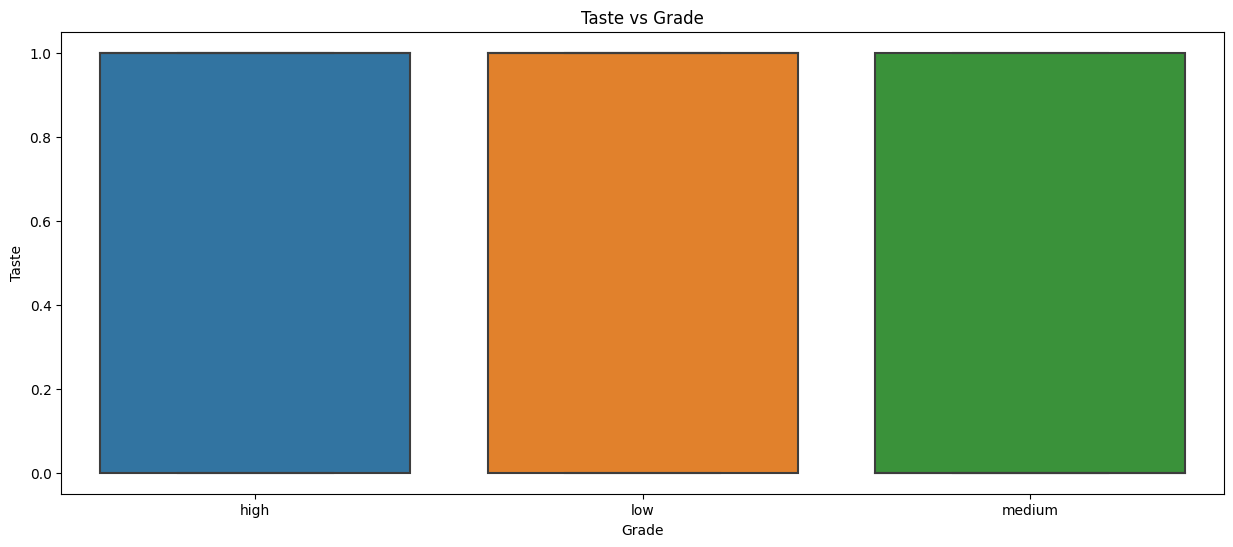

In [29]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Taste")
plt.title('Taste vs Grade')
plt.xlabel('Grade')
plt.ylabel('Taste')
plt.show()

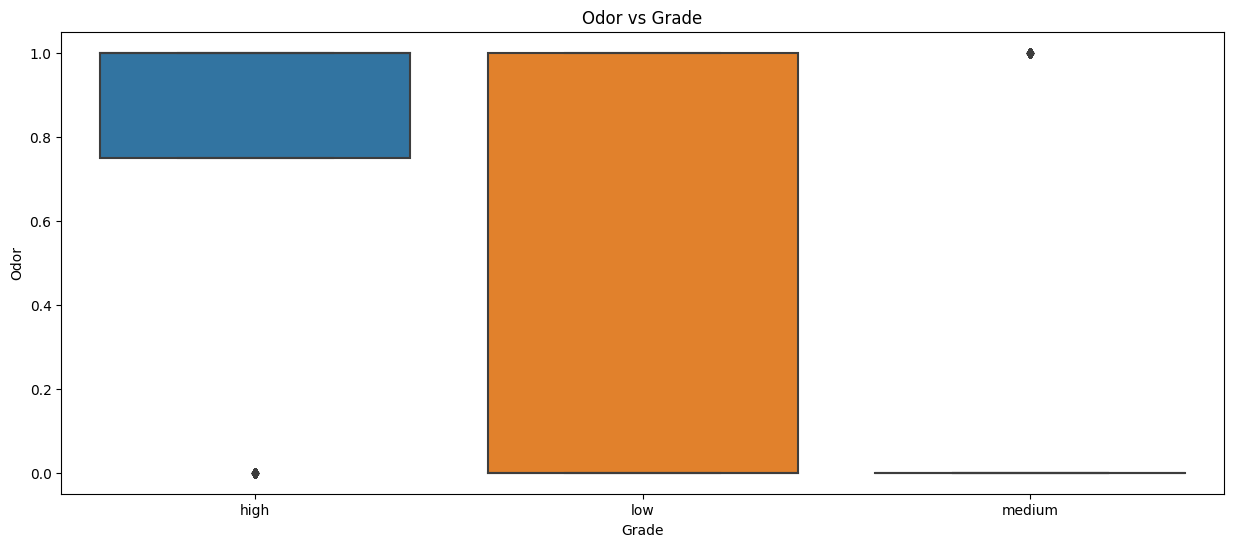

In [30]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Odor")
plt.title('Odor vs Grade')
plt.xlabel('Grade')
plt.ylabel('Odor')
plt.show()


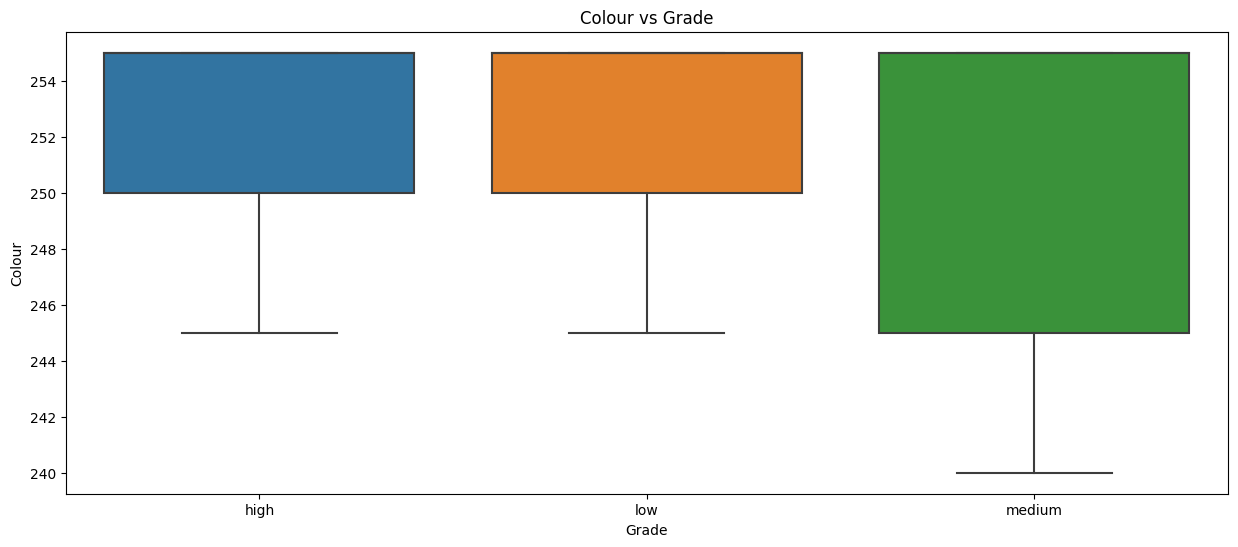

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Colour")
plt.title('Colour vs Grade')
plt.xlabel('Grade')
plt.ylabel('Colour')
plt.show()

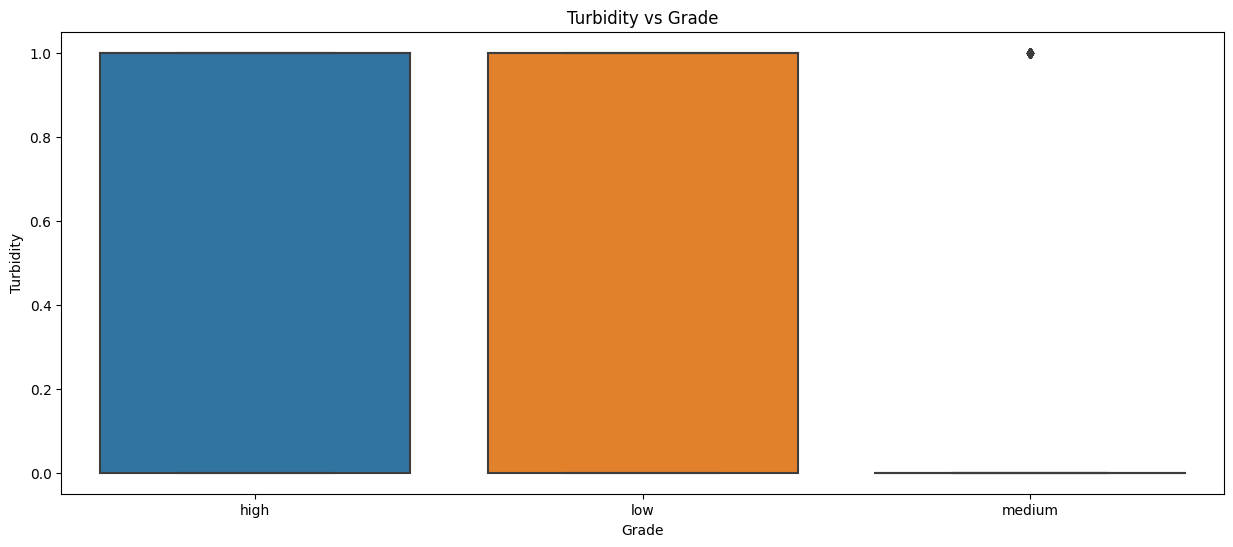

In [32]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Turbidity")
plt.title('Turbidity vs Grade')
plt.xlabel('Grade')
plt.ylabel('Turbidity')
plt.show()

##**Visualization the relation between features-**

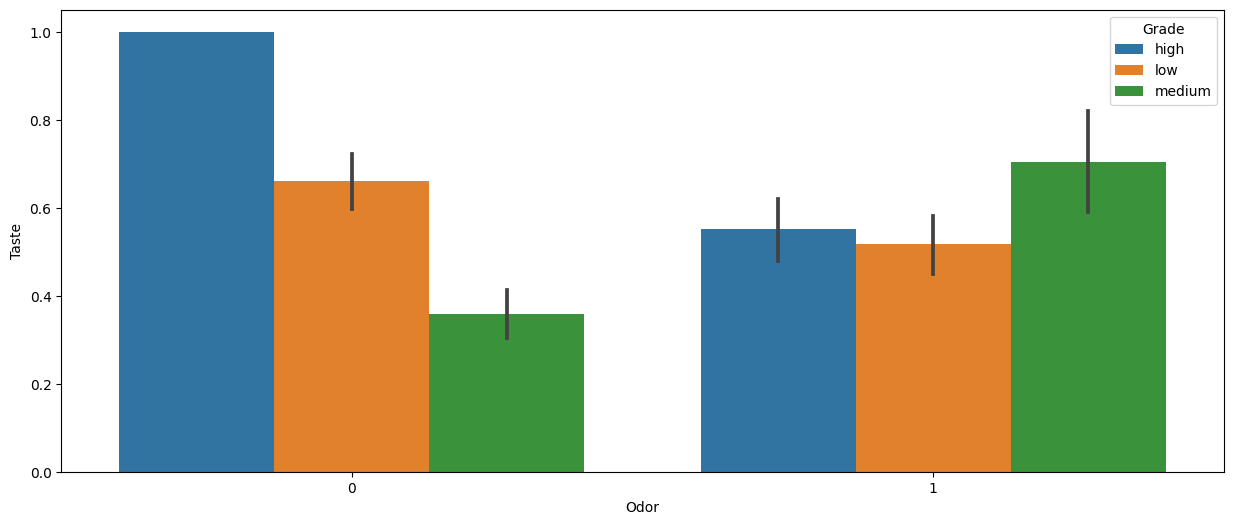

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=df)
plt.show()

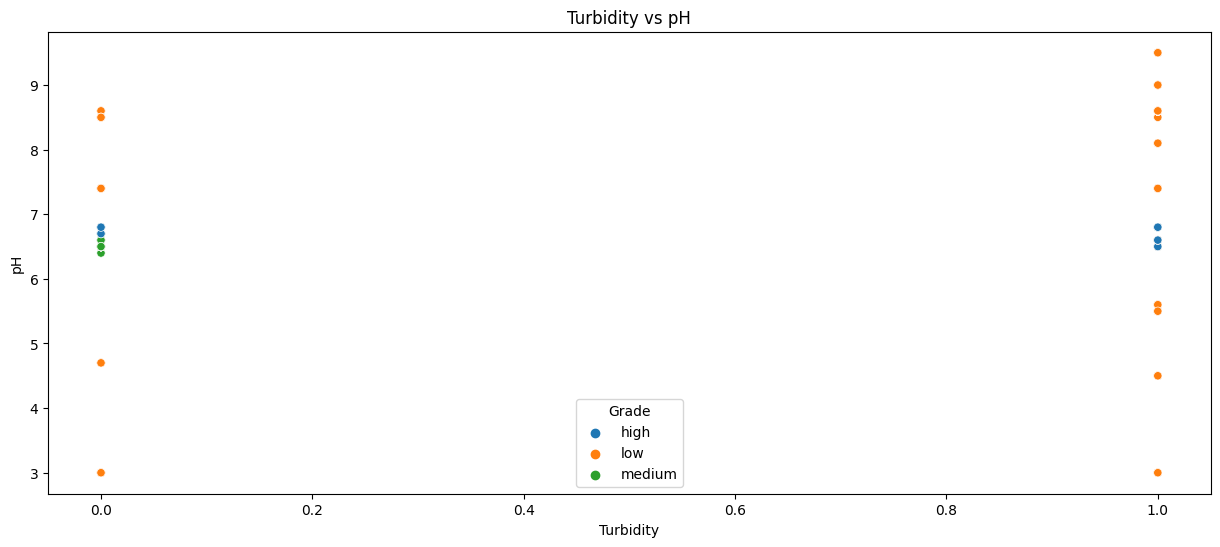

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=df)
plt.title('Turbidity vs pH')
plt.show()

#**Correlation-**

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

In [35]:
df_corr = df.corr()

In [36]:
df_corr

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


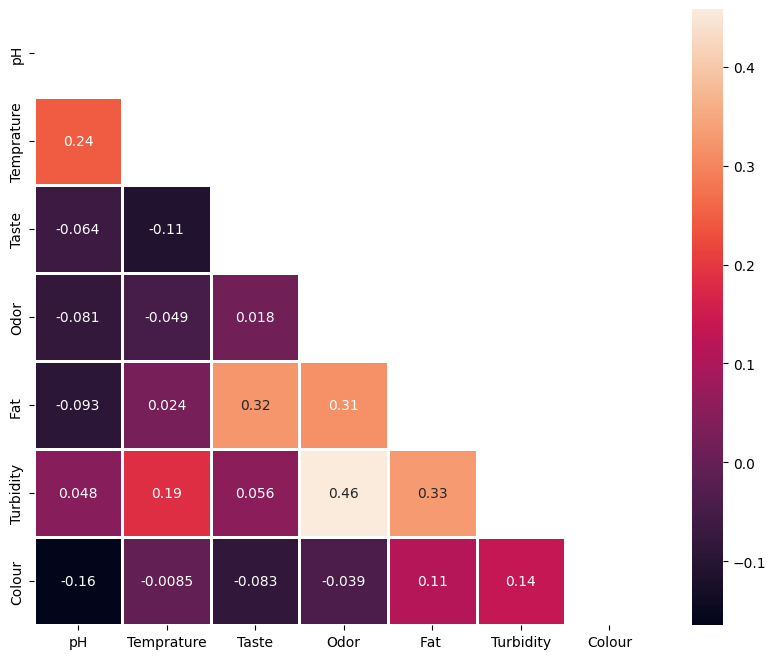

In [37]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()


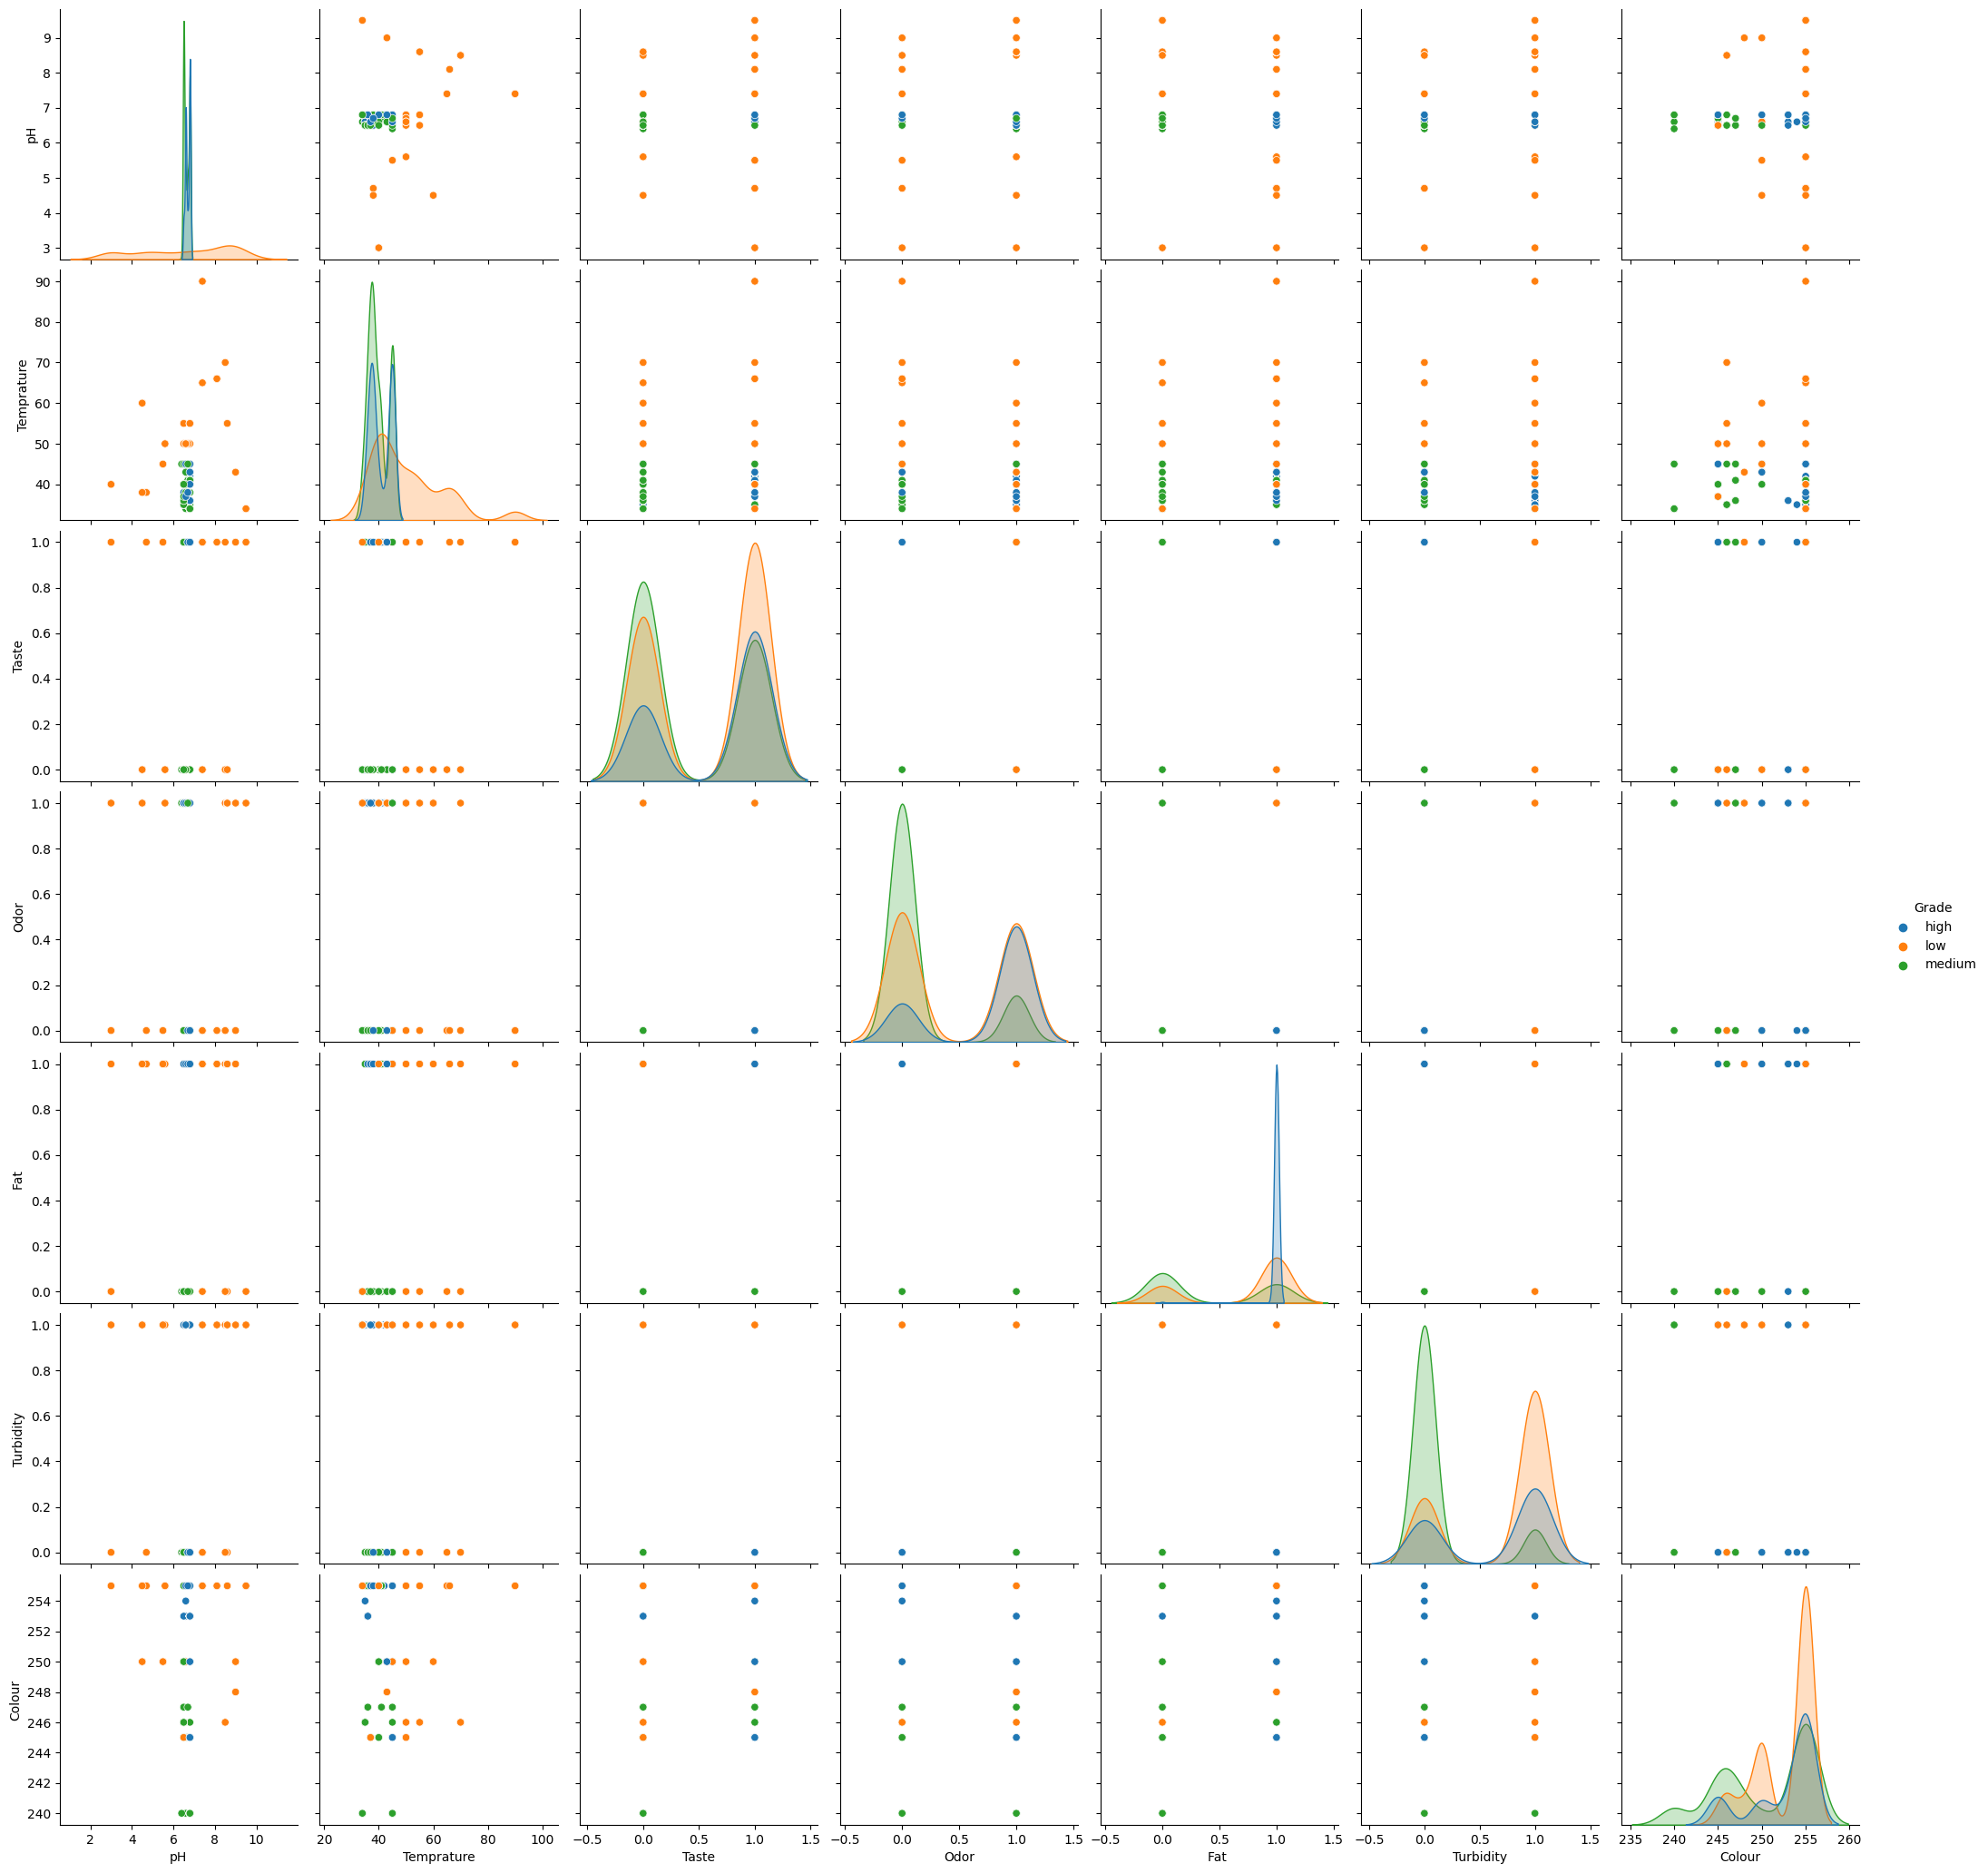

In [38]:
sns.pairplot(df,hue="Grade",height=3)
plt.show()

In [39]:
#Encoding the target variable-

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])
df['Grade'].unique()

array([0, 1, 2])

In [40]:
# Train-Test Data

X= df.drop("Temprature", axis = 1) 
y= df["Temprature"]

In [41]:
#Splitting the dataset into Training and Test-

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.80, random_state = 41)

#**Model Building-**

##**#LinearRegression-**

In [42]:

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print('R2-Score:',r2)

Mean Squared Error: 95.6316242946285
R2-Score: 0.14763496777448915


##**#DecisionTree-**

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, random_state=42) 
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('R2-Score:',r2)


Mean Squared Error: 16.55803211456336
R2-Score: 0.8524181965848553


##**#RandomForest-**

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('R2-Score:',r2)

Mean Squared Error: 13.642695673957737
R2-Score: 0.8784026014035925
